## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df= application_df.drop(columns=["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Or 
for x in application_df.columns: 
    print(x, len(application_df[x].unique()))

APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

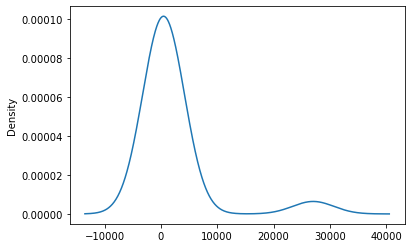

In [6]:
# Visualize the value counts of Application-type
application_counts.plot.density()

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts= classification_counts[classification_counts>1]
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts<100].index)
classifications_to_replace
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      643
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C1370        1
C1236        1
C2190        1
C4200        1
C5200        1
C1900        1
C2600        1
C1248        1
C6100        1
C1820        1
C1580        1
C2570        1
C1732        1
C3700        1
C2500        1
C1570        1
C1283        1
C2380        1
C1728        1
C2170        1
C4120        1
C8210        1
C4500        1
C1245        1
C2561        1
C2150        1
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df=pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
y
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
X
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=152)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features= len(X_train_scaled[0])
hidden_nodes_layer1=10
hidden_nodes_layer2=20
hidden_nodes_layer3=40
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation ='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid'))

# Check the structure of the model
nn_model.summary()
# Other optinos 
# 1st Hidden Layer: 3520 params = [43 inputs (from input layer) * 80 neurons] + (80 bias terms)
# 2nd Hidden Layer: 2430 params = [80 inputs (from 1st hidden layer) * 30 neurons] + (30 bias terms)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                760       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [16]:
# Create a callback that saves the model's weights every 5 epochs
callback = tf.keras.callbacks.ModelCheckpoint(filepath = "Models/weights.{epoch:05d}.hdf5", save_freg = "epoch", period=5)

In [17]:
# Train the model
fit_model =nn_model.fit(X_train_scaled, y_train, validation_split=0.15, epochs=100)


Epoch 1/100
684/684 [==============================] - 1s 838us/step - loss: 0.6087 - accuracy: 0.6905 - val_loss: 0.5581 - val_accuracy: 0.7357
Epoch 2/100
684/684 [==============================] - 0s 647us/step - loss: 0.5665 - accuracy: 0.7208 - val_loss: 0.5515 - val_accuracy: 0.7346
Epoch 3/100
684/684 [==============================] - 0s 647us/step - loss: 0.5596 - accuracy: 0.7238 - val_loss: 0.5456 - val_accuracy: 0.7362
Epoch 4/100
684/684 [==============================] - 0s 659us/step - loss: 0.5567 - accuracy: 0.7260 - val_loss: 0.5428 - val_accuracy: 0.7354
Epoch 5/100
684/684 [==============================] - 0s 654us/step - loss: 0.5541 - accuracy: 0.7258 - val_loss: 0.5414 - val_accuracy: 0.7367
Epoch 6/100
684/684 [==============================] - 0s 682us/step - loss: 0.5531 - accuracy: 0.7266 - val_loss: 0.5402 - val_accuracy: 0.7328
Epoch 7/100
684/684 [==============================] - 0s 648us/step - loss: 0.5525 - accuracy: 0.7270 - val_loss: 0.5391 - val_ac

684/684 [==============================] - 0s 666us/step - loss: 0.5418 - accuracy: 0.7330 - val_loss: 0.5395 - val_accuracy: 0.7367
Epoch 58/100
684/684 [==============================] - 0s 666us/step - loss: 0.5416 - accuracy: 0.7331 - val_loss: 0.5398 - val_accuracy: 0.7357
Epoch 59/100
684/684 [==============================] - 0s 670us/step - loss: 0.5415 - accuracy: 0.7332 - val_loss: 0.5385 - val_accuracy: 0.7372
Epoch 60/100
684/684 [==============================] - 0s 655us/step - loss: 0.5416 - accuracy: 0.7335 - val_loss: 0.5379 - val_accuracy: 0.7365
Epoch 61/100
684/684 [==============================] - 0s 657us/step - loss: 0.5412 - accuracy: 0.7341 - val_loss: 0.5374 - val_accuracy: 0.7357
Epoch 62/100
684/684 [==============================] - 0s 657us/step - loss: 0.5419 - accuracy: 0.7330 - val_loss: 0.5397 - val_accuracy: 0.7365
Epoch 63/100
684/684 [==============================] - 0s 675us/step - loss: 0.5415 - accuracy: 0.7330 - val_loss: 0.5400 - val_accuracy

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5526 - accuracy: 0.7354 - 120ms/epoch - 448us/step
Loss: 0.5525544285774231, Accuracy: 0.7353935837745667


In [19]:
# Export our model to HDF5 file
nn_model.save('Models/AlphabetSoupCharity_Final.h5')

## Compile, Train and Evaluate the Model (2nd Attempt)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model2 = tf.keras.models.Sequential()

# First hidden layer
nn_model2.add(tf.keras.layers.Dense(units = 32, activation = 'relu' , input_dim = 75)) 

# Second hidden layer
nn_model2.add(tf.keras.layers.Dense(units = 32, activation = 'relu' , input_dim = 75)) 

# Third hidden layer
nn_model2.add(tf.keras.layers.Dense(units = 32, activation = 'relu' , input_dim = 75)) 

# Output layer
nn_model2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                2432      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,577
Trainable params: 4,577
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn_model2.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 623us/step - loss: 0.5757 - accuracy: 0.7126
Epoch 2/100
804/804 [==============================] - 0s 609us/step - loss: 0.5533 - accuracy: 0.7259
Epoch 3/100
804/804 [==============================] - 0s 613us/step - loss: 0.5503 - accuracy: 0.7282
Epoch 4/100
804/804 [==============================] - 0s 602us/step - loss: 0.5481 - accuracy: 0.7299
Epoch 5/100
804/804 [==============================] - 0s 609us/step - loss: 0.5463 - accuracy: 0.7311
Epoch 6/100
804/804 [==============================] - 0s 612us/step - loss: 0.5463 - accuracy: 0.7301
Epoch 7/100
804/804 [==============================] - 1s 651us/step - loss: 0.5450 - accuracy: 0.7329
Epoch 8/100
804/804 [==============================] - 0s 615us/step - loss: 0.5444 - accuracy: 0.7304
Epoch 9/100
804/804 [==============================] - 0s 607us/step - loss: 0.5435 - accuracy: 0.7320
Epoch 10/100
804/804 [==============================] - 0s 603us/step - l

804/804 [==============================] - 0s 607us/step - loss: 0.5324 - accuracy: 0.7387
Epoch 80/100
804/804 [==============================] - 0s 610us/step - loss: 0.5333 - accuracy: 0.7381
Epoch 81/100
804/804 [==============================] - 0s 606us/step - loss: 0.5329 - accuracy: 0.7383
Epoch 82/100
804/804 [==============================] - 0s 600us/step - loss: 0.5326 - accuracy: 0.7386
Epoch 83/100
804/804 [==============================] - 0s 601us/step - loss: 0.5329 - accuracy: 0.7388
Epoch 84/100
804/804 [==============================] - 0s 611us/step - loss: 0.5323 - accuracy: 0.7387
Epoch 85/100
804/804 [==============================] - 0s 609us/step - loss: 0.5325 - accuracy: 0.7383
Epoch 86/100
804/804 [==============================] - 0s 615us/step - loss: 0.5320 - accuracy: 0.7384
Epoch 87/100
804/804 [==============================] - 0s 596us/step - loss: 0.5331 - accuracy: 0.7378
Epoch 88/100
804/804 [==============================] - 0s 591us/step - loss:

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5589 - accuracy: 0.7324 - 195ms/epoch - 728us/step
Loss: 0.5588911175727844, Accuracy: 0.7323614954948425


In [24]:
# Export our model to HDF5 file
nn_model2.save('Models/AlphabetSoupCharity_Final_2.h5')

## Compile, Train and Evaluate the Model (3rd Attempt)

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model3 = tf.keras.models.Sequential()

# First hidden layer
nn_model3.add(tf.keras.layers.Dense(units = 75, activation = 'relu' , input_dim = 75)) 

# Second hidden layer
nn_model3.add(tf.keras.layers.Dense(units = 75, activation = 'relu' , input_dim = 75)) 

# Third hidden layer
nn_model3.add(tf.keras.layers.Dense(units = 75, activation = 'relu' , input_dim = 75)) 

# Output layer
nn_model3.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 75)                5700      
                                                                 
 dense_8 (Dense)             (None, 75)                5700      
                                                                 
 dense_9 (Dense)             (None, 75)                5700      
                                                                 
 dense_10 (Dense)            (None, 1)                 76        
                                                                 
Total params: 17,176
Trainable params: 17,176
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn_model3.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [27]:
# Create a callback that saves the model's weights every 5 epochs
callback = tf.keras.callbacks.ModelCheckpoint(filepath = "Models/weights.{epoch:05d}.hdf5", save_freg = "epoch", period=5)

In [28]:
# Train the model
fit_model3 =nn_model3.fit(X_train_scaled, y_train, validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 1s 858us/step - loss: 0.5759 - accuracy: 0.7160 - val_loss: 0.5450 - val_accuracy: 0.7367
Epoch 2/100
684/684 [==============================] - 1s 750us/step - loss: 0.5555 - accuracy: 0.7251 - val_loss: 0.5469 - val_accuracy: 0.7328
Epoch 3/100
684/684 [==============================] - 1s 741us/step - loss: 0.5518 - accuracy: 0.7285 - val_loss: 0.5432 - val_accuracy: 0.7344
Epoch 4/100
684/684 [==============================] - 1s 756us/step - loss: 0.5511 - accuracy: 0.7268 - val_loss: 0.5426 - val_accuracy: 0.7365
Epoch 5/100
684/684 [==============================] - 1s 754us/step - loss: 0.5495 - accuracy: 0.7297 - val_loss: 0.5419 - val_accuracy: 0.7365
Epoch 6/100
684/684 [==============================] - 1s 742us/step - loss: 0.5477 - accuracy: 0.7305 - val_loss: 0.5431 - val_accuracy: 0.7341
Epoch 7/100
684/684 [==============================] - 1s 742us/step - loss: 0.5468 - accuracy: 0.7314 - val_loss: 0.5425 - val_ac

684/684 [==============================] - 1s 819us/step - loss: 0.5326 - accuracy: 0.7384 - val_loss: 0.5539 - val_accuracy: 0.7359
Epoch 58/100
684/684 [==============================] - 1s 763us/step - loss: 0.5333 - accuracy: 0.7393 - val_loss: 0.5514 - val_accuracy: 0.7354
Epoch 59/100
684/684 [==============================] - 1s 734us/step - loss: 0.5325 - accuracy: 0.7393 - val_loss: 0.5513 - val_accuracy: 0.7362
Epoch 60/100
684/684 [==============================] - 1s 747us/step - loss: 0.5331 - accuracy: 0.7389 - val_loss: 0.5508 - val_accuracy: 0.7344
Epoch 61/100
684/684 [==============================] - 1s 760us/step - loss: 0.5329 - accuracy: 0.7388 - val_loss: 0.5478 - val_accuracy: 0.7370
Epoch 62/100
684/684 [==============================] - 1s 739us/step - loss: 0.5320 - accuracy: 0.7385 - val_loss: 0.5529 - val_accuracy: 0.7352
Epoch 63/100
684/684 [==============================] - 1s 744us/step - loss: 0.5321 - accuracy: 0.7386 - val_loss: 0.5560 - val_accuracy

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5849 - accuracy: 0.7352 - 131ms/epoch - 489us/step
Loss: 0.5849457383155823, Accuracy: 0.7351603507995605


In [30]:
# Export our model to HDF5 file
nn_model3.save('Models/AlphabetSoupCharity_Final_3.h5')
